In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [3]:
def gen_data():
    X = []
    y = []
    for i in range(0,100):
        X.append(np.random.uniform(1,0))
        epsilon = np.random.uniform(-0.3,0.3)
        y.append(math.sin(2 * math.pi * X[i]) + epsilon)
    return(X,y)  

In [11]:
def mse_loss(y_cap,y):
    return (y_cap - y)**2

def mse_loss_derv(y_cap,y):
    return ((y_cap - y))

def gen_thetas(M):
    poly = np.random.uniform(-0.5,0.5, M)
    return poly


In [5]:
def poly_model(x, thetas):
    y_cap = np.sum([(thetas[i])*x**i for i in range(len(thetas))])
    return(y_cap)

def poly_model_derv(x, i):
    return x**i

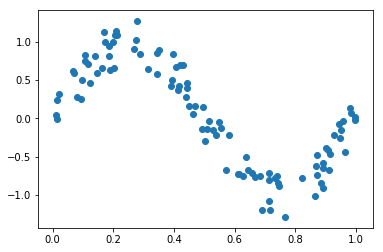

In [20]:
M = 5
lr = 0.025

X,y = gen_data()

thetas = gen_thetas(M)

plt.scatter(X,y)
plt.show()

In [7]:
def prediction(X,thetas):
    y_predicted = []
    for i in range(100):
        y_predicted.append(poly_model(X[i],thetas))
    return y_predicted

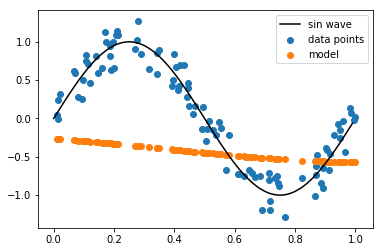

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,y, label='data points')

time = np.arange(0,1,0.01)
amplitude = np.sin(2*np.pi*time)
ax.plot(time,amplitude,'black', label = 'sin wave')

plt.scatter(X,prediction(X,thetas), label = 'model')
plt.legend()
plt.show()

In [23]:
def sgd(Xg,yg,lr,epochs=5000):
    loss = []
    b = 0
    error = 0
    for k in range(epochs):
        error = 0
        #for 100 iterations
        for i in range(len(Xg)):
            y_cap = poly_model(Xg[i],thetas)
            
            #for thetas
            for j in range(M):
            
                gradient = mse_loss_derv(y_cap,yg[i]) * poly_model_derv(Xg[i],j)
                thetas[j] = thetas[j] - (lr * gradient)
            
            error += mse_loss(y_cap,yg[i])
#         if k%100 == 0:
#             b = 0
        
        loss.append(error/100)
#         b+=1
        
    return loss,thetas

In [24]:
l,t = sgd(X,y,lr)

In [22]:
print(t)

[  0.0455663    7.31381098 -16.12245759  -2.99050998  12.10578975]


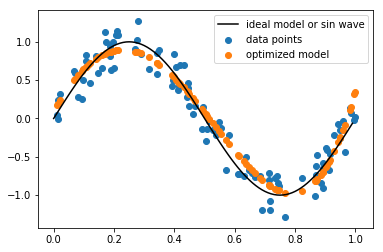

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(X,y, label='data points')

time = np.arange(0,1,0.01)
amplitude = np.sin(2*np.pi*time)
ax.plot(time,amplitude, 'black',label='ideal model or sin wave')

y_new = prediction(X,t)
plt.scatter(X,y_new, label='optimized model')
plt.legend()
plt.show()


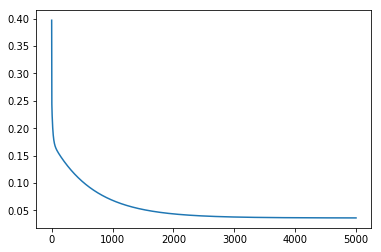

[0.3971715488568514, 0.28721148239581384, 0.2557930906302093, 0.24378716918517937, 0.2376458516146876, 0.23332974743465598, 0.22964916749808995, 0.22626166681088491, 0.22307090076685196, 0.22004885446843947, 0.21718480772897827, 0.2144715401508327, 0.21190209094878, 0.20946929125051011, 0.2071658966251554, 0.20498476893043324, 0.20291900074455277, 0.20096198330187484, 0.1991074364307731, 0.1973494160259726, 0.1956823091477043, 0.1941008227145102, 0.19259996915842387, 0.19117505089165873, 0.1898216445763267, 0.18853558571398646, 0.18731295381219293, 0.1861500582445684, 0.18504342484555053, 0.18398978324119106, 0.18298605489696002, 0.18202934185354938, 0.18111691611735461, 0.18024620967098584, 0.17941480506941518, 0.17862042658842409, 0.17786093189344143, 0.17713430419846088, 0.17643864488635144, 0.17577216656347983, 0.17513318652311635, 0.17452012059356875, 0.17393147734839906, 0.17336585265739946, 0.17282192455826118, 0.1722984484300467, 0.17179425245068805, 0.17130823332178433, 0.1708

In [26]:
plt.plot(np.arange(5000),l)
plt.show()
# print(len(l))
print(l)